In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [33]:
data = fashion_mnist.load_data()

In [34]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [35]:
(x_train,y_train),(x_test,y_test) = data

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
y_train.shape

(60000,)

In [39]:
y_test.shape

(10000,)

expand dimensions  and scale the data 

In [40]:
import numpy as np

In [41]:
x_train  = x_train/255
x_test = x_test/255

In [42]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [43]:
x_train.shape

(60000, 28, 28, 1)

In [44]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

CNN 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout,Input

In [46]:
cnn = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(100,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Conv2D(75,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Conv2D(50,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Conv2D(25,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
]
)



cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
hist = cnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.6667 - loss: 0.9161 - val_accuracy: 0.8658 - val_loss: 0.3621
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.8630 - loss: 0.3890 - val_accuracy: 0.8777 - val_loss: 0.3300
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.8890 - loss: 0.3122 - val_accuracy: 0.8995 - val_loss: 0.2823
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 42ms/step - accuracy: 0.9003 - loss: 0.2782 - val_accuracy: 0.9042 - val_loss: 0.2686
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 43ms/step - accuracy: 0.9092 - loss: 0.2544 - val_accuracy: 0.9093 - val_loss: 0.2492
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9206 - loss: 0.2257 - val_accuracy: 0.9092 - val_loss: 0.2632
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9239 - loss: 0.2083 - val_accuracy: 0.9050 - val_loss: 0.2726
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.9315 -

In [48]:
hist.history

{'accuracy': [0.7799814939498901,
  0.8699814677238464,
  0.89083331823349,
  0.9026296138763428,
  0.9117222428321838,
  0.91909259557724,
  0.9245926141738892,
  0.9292222261428833,
  0.9320740699768066,
  0.9365370273590088],
 'loss': [0.6158932447433472,
  0.36840173602104187,
  0.31023716926574707,
  0.2745601534843445,
  0.24945490062236786,
  0.23096327483654022,
  0.21060340106487274,
  0.1982416808605194,
  0.1883888840675354,
  0.17377826571464539],
 'val_accuracy': [0.8658333420753479,
  0.8776666522026062,
  0.8995000123977661,
  0.9041666388511658,
  0.909333348274231,
  0.909166693687439,
  0.9049999713897705,
  0.9131666421890259,
  0.9120000004768372,
  0.9139999747276306],
 'val_loss': [0.36207011342048645,
  0.3299790620803833,
  0.28232184052467346,
  0.2686346769332886,
  0.24922987818717957,
  0.26316583156585693,
  0.27262818813323975,
  0.24608761072158813,
  0.24878239631652832,
  0.27243033051490784]}

In [49]:
accuracy = hist.history['accuracy']
loss = hist.history['loss']
val_accuracy = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

In [50]:
import matplotlib.pyplot as plt

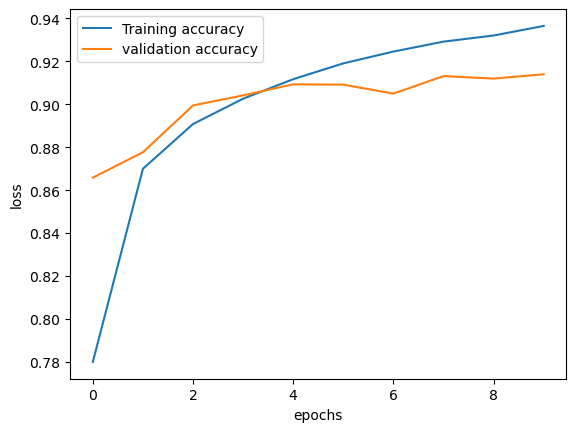

In [53]:
plt.plot(accuracy,label = 'Training accuracy')
plt.plot(val_accuracy,label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()

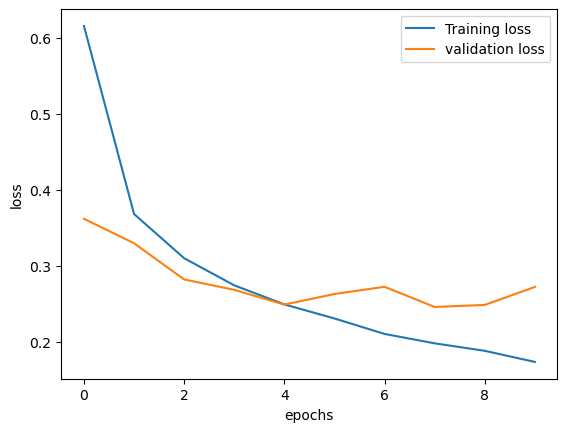

In [54]:
plt.plot(loss,label = 'Training loss')
plt.plot(val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

To evaluate whether the model is trained well and free from overfitting, you should examine the **training** and **validation accuracy (or loss)** curves:

---

### **Key Points for the Graphs:**

1. **Training Accuracy vs. Validation Accuracy:**
   - Ideally, the **validation accuracy** curve should lie close to or slightly below the **training accuracy** curve.
   - If the validation accuracy is significantly lower than the training accuracy, it indicates **overfitting**.

2. **Training Loss vs. Validation Loss:**
   - The **validation loss** should also closely follow the **training loss** curve.
   - If the validation loss starts increasing while the training loss continues decreasing, it's a strong sign of overfitting.

---

### **Indicators of a Well-Trained Model:**
1. The gap between training and validation accuracy (or loss) is small.
2. Both training and validation accuracy improve steadily and saturate at similar levels.
3. The validation loss decreases or stabilizes without increasing significantly after a certain number of epochs.

---

### **Example Scenarios:**

#### **Good Training (No Overfitting):**
- Training and validation accuracy curves are close.
- Validation accuracy reaches a similar level as training accuracy.
  
#### **Overfitting:**
- Training accuracy is very high, but validation accuracy stagnates or drops.
- Validation loss increases while training loss decreases.

#### **Underfitting:**
- Both training and validation accuracy are low.
- The model has not learned enough to capture the data patterns.

---

### **What to Do in Case of Overfitting:**
1. **Add Regularization:** Use `Dropout`, `L2 Regularization`, or both.
2. **Early Stopping:** Monitor validation loss and stop training when it starts increasing.
3. **Augment Data:** Introduce transformations (e.g., rotations, zooms) to make the dataset more diverse.
4. **Simplify the Model:** Reduce the number of layers or u'd like to explore any of these fixes further!

since the loss curves are showing that the model is slightly overfit,,,lets try performing each of these steps 

#### Regularization

L2 Regularization (Ridge Regularization)

L2 regularization adds a penalty term to the loss function to prevent the model from learning overly complex patterns, thereby reducing overfitting.

It discourages large weights in the model by adding the squared magnitude of the weights to the loss function.

In [58]:
from tensorflow.keras.regularizers import l2

In [59]:
cnn_1 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(100,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)),
    MaxPool2D((2,2)),
    Conv2D(75,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)),
    MaxPool2D((2,2)),
    Conv2D(50,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)),
    MaxPool2D((2,2)),
    Conv2D(25,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10,activation='softmax')
]
)



cnn_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Regularization Strength (l2(0.01)):

0.01: Common starting value. Adjust based on model performance.

Larger values increase the penalty, making the model less complex.

** When to Use **:

Use L2 regularization when the training accuracy is much higher than the validation accuracy (indicating overfitting).
Combining with Dropout:

Dropout and L2 regularization can work together to reduce overfitting further.


#### Effects of L2 Regularization:

Reduced Overfitting: Helps control the model's complexity.

Better Generalization: Improves validation accuracy.

In [61]:
hist_1 = cnn_1.fit(x_train,y_train,validation_split=0.1,batch_size=32,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.6829 - loss: 1.1163 - val_accuracy: 0.7625 - val_loss: 0.8341
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.7636 - loss: 0.8602 - val_accuracy: 0.8017 - val_loss: 0.7490
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.7855 - loss: 0.7964 - val_accuracy: 0.8078 - val_loss: 0.7299
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.8021 - loss: 0.7534 - val_accuracy: 0.8163 - val_loss: 0.6914
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.8035 - loss: 0.7419 - val_accuracy: 0.8277 - val_loss: 0.6663
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.8120 - loss: 0.7245 - val_accuracy: 0.8293 - val_loss: 0.6521
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.8172 - loss: 0.7039 - val_accuracy: 0.8223 - val_loss: 0.6593
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.8177 -

In [62]:
hist_1.history

{'accuracy': [0.7153333425521851,
  0.7706851959228516,
  0.7877777814865112,
  0.8033888936042786,
  0.8097222447395325,
  0.8130925893783569,
  0.818240761756897,
  0.8193703889846802,
  0.8241296410560608,
  0.8240185379981995],
 'loss': [1.0145063400268555,
  0.8431411385536194,
  0.7903211116790771,
  0.7549495100975037,
  0.7307124733924866,
  0.7170453071594238,
  0.7018165588378906,
  0.691055417060852,
  0.6780259609222412,
  0.6743432283401489],
 'val_accuracy': [0.762499988079071,
  0.8016666769981384,
  0.8078333139419556,
  0.8163333535194397,
  0.8276666402816772,
  0.8293333053588867,
  0.8223333358764648,
  0.8373333215713501,
  0.8358333110809326,
  0.840666651725769],
 'val_loss': [0.8341265320777893,
  0.7490240335464478,
  0.7299116849899292,
  0.691355288028717,
  0.6662740111351013,
  0.6521218419075012,
  0.6592759490013123,
  0.6331977844238281,
  0.6213042140007019,
  0.611070454120636]}

In [63]:
accuracy_1 = hist_1.history['accuracy']
loss_1 = hist_1.history['loss']
val_accuracy_1 = hist_1.history['val_accuracy']
val_loss_1 = hist_1.history['val_loss']

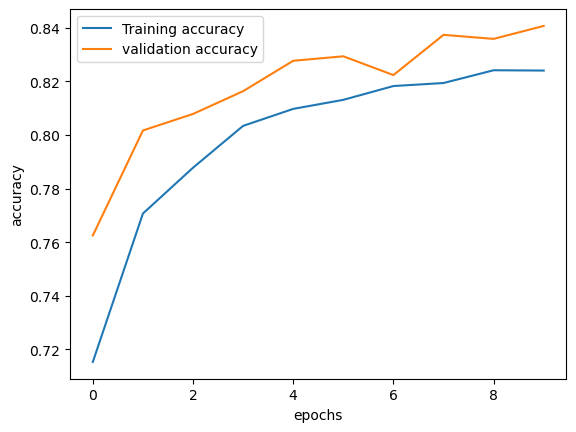

In [64]:
plt.plot(accuracy_1,label='Training accuracy')
plt.plot(val_accuracy_1,label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

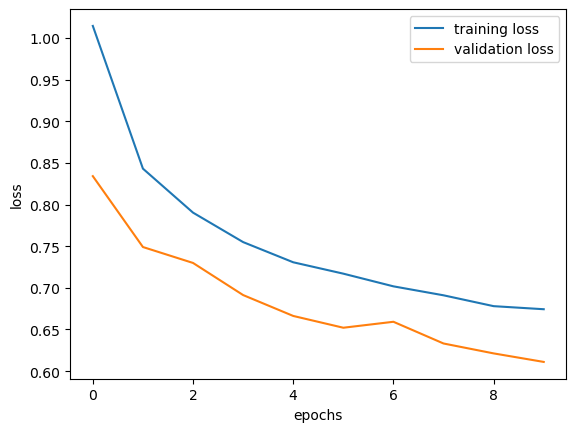

In [65]:
plt.plot(loss_1,label='training loss')
plt.plot(val_loss_1,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

The model is well-trained with good generalization. There is no significant overfitting or underfitting based on the metrics provided. Keep fine-tuning hyperparameters (e.g., epochs, batch size, regularization strength) if necessary for further improvements.

In [70]:
cnn_2 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(100,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.02)),
    MaxPool2D((2,2)),
    Conv2D(75,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.02)),
    MaxPool2D((2,2)),
    Conv2D(50,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.02)),
    MaxPool2D((2,2)),
    Conv2D(25,(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.02)),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu',kernel_regularizer=l2(0.02)),
    Dropout(0.5),
    Dense(10,activation='softmax')
]
)



cnn_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
hist_2 = cnn_2.fit(x_train,y_train,validation_split=0.1,epochs=10,batch_size=16)

Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 102s 28ms/step - accuracy: 0.5502 - loss: 1.6265 - val_accuracy: 0.7408 - val_loss: 0.9474
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 91s 27ms/step - accuracy: 0.7143 - loss: 1.0104 - val_accuracy: 0.7523 - val_loss: 0.8863
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - accuracy: 0.7284 - loss: 0.9598 - val_accuracy: 0.7628 - val_loss: 0.8411
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 91s 27ms/step - accuracy: 0.7417 - loss: 0.9164 - val_accuracy: 0.7743 - val_loss: 0.8075
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 92s 27ms/step - accuracy: 0.7534 - loss: 0.8814 - val_accuracy: 0.7647 - val_loss: 0.8098
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 87s 26ms/step - accuracy: 0.7554 - loss: 0.8722 - val_accuracy: 0.7655 - val_loss: 0.8179
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 87s 26ms/step - accuracy: 0.7595 - loss: 0.8595 - val_accuracy: 0.7762 - val_loss: 0.8254
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - accuracy: 0.7671 

In [72]:
hist_2.history

{'accuracy': [0.6460185050964355,
  0.7216481566429138,
  0.7336296439170837,
  0.7433703541755676,
  0.7512592673301697,
  0.7573148012161255,
  0.7615000009536743,
  0.7667962908744812,
  0.7708888649940491,
  0.7747222185134888],
 'loss': [1.2333014011383057,
  0.9904526472091675,
  0.9457610845565796,
  0.9121761322021484,
  0.8868674635887146,
  0.8700141310691833,
  0.8539491295814514,
  0.8436675071716309,
  0.8342970013618469,
  0.8239259123802185],
 'val_accuracy': [0.7408333420753479,
  0.7523333430290222,
  0.7628333568572998,
  0.7743333578109741,
  0.7646666765213013,
  0.765500009059906,
  0.7761666774749756,
  0.7831666469573975,
  0.7960000038146973,
  0.7988333106040955],
 'val_loss': [0.9474170804023743,
  0.8862794637680054,
  0.8410546779632568,
  0.807486891746521,
  0.8098449110984802,
  0.8178984522819519,
  0.8253956437110901,
  0.779104471206665,
  0.7543424367904663,
  0.7395264506340027]}

In [73]:
accuracy_2 = hist_2.history['accuracy']
loss_2 = hist_2.history['loss']
val_accuracy_2 = hist_2.history['val_accuracy']
val_loss_2 = hist_2.history['val_loss']

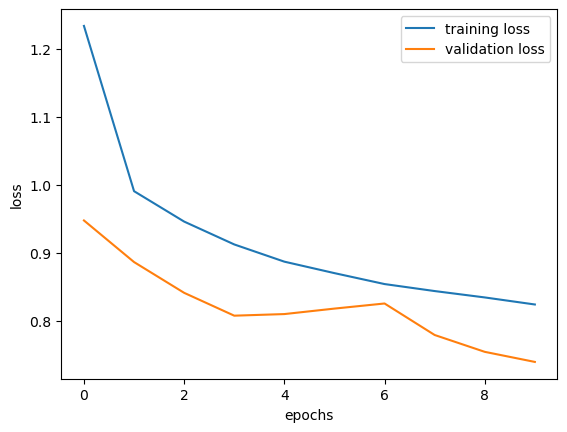

In [74]:
plt.plot(loss_2,label='training loss')
plt.plot(val_loss_2,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

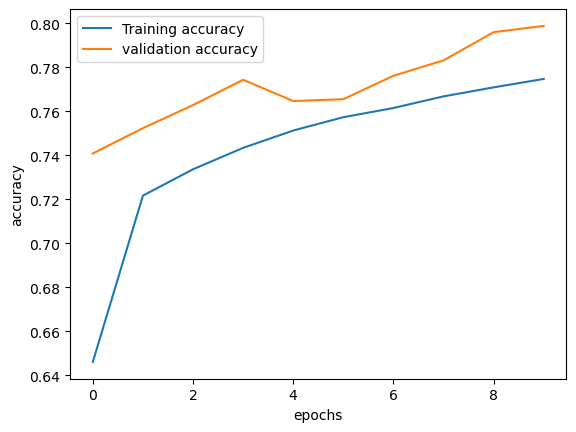

In [75]:
plt.plot(accuracy_2,label='Training accuracy')
plt.plot(val_accuracy_2,label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

predictions

In [76]:
y_pred = cnn_2.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step


In [81]:
y_pred_fin = []
for x in y_pred:
    y_pred_fin.append(np.argmax(x))

In [82]:
y_pred_fin

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 7,
 7,
 5,
 1,
 6,
 4,
 3,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 3,
 9,
 6,
 7,
 2,
 1,
 4,
 2,
 2,
 2,
 5,
 8,
 4,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 6,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 4,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 4,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 6,
 2,
 1,
 6,
 5,
 6,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 4,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 4,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 3,
 2,
 1,
 2,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 7,
 4,
 8,
 5,
 6,
 0,
 7,
 7,
 0,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 6,
 4,
 8,
 2,
 4,
 6,
 4,


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
clf_rep = classification_report(y_test,y_pred_fin)

In [85]:
print(clf_rep)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1000
           1       0.96      0.92      0.94      1000
           2       0.67      0.60      0.63      1000
           3       0.72      0.86      0.78      1000
           4       0.63      0.80      0.70      1000
           5       0.96      0.86      0.90      1000
           6       0.45      0.34      0.39      1000
           7       0.87      0.92      0.89      1000
           8       0.92      0.94      0.93      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



In [87]:
con_mat = confusion_matrix(y_test,y_pred_fin)

In [88]:
con_mat

array([[710,  12,  10, 112,   4,   1, 132,   1,  18,   0],
       [  4, 915,  10,  58,   9,   0,   3,   0,   1,   0],
       [  6,   1, 598,  11, 227,   0, 141,   0,  16,   0],
       [ 17,  18,   9, 857,  30,   0,  67,   0,   2,   0],
       [  0,   3,  85,  46, 801,   0,  57,   0,   8,   0],
       [  0,   0,   0,   4,   0, 857,   0,  89,   8,  42],
       [151,   4, 173,  95, 202,   0, 344,   0,  31,   0],
       [  0,   0,   0,   0,   0,  21,   0, 920,   0,  59],
       [  2,   2,   9,  11,   4,   3,  25,   5, 938,   1],
       [  0,   0,   0,   2,   0,  12,   0,  46,   0, 940]], dtype=int64)

In [91]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [92]:
misclassified = y_test[y_test!=y_pred_fin]

In [93]:
misclassified

array([7, 4, 5, ..., 6, 2, 6], dtype=uint8)

In [94]:
len(misclassified)

2120